<a href="https://colab.research.google.com/github/Praveensaitalupuri/Operating-system-lab/blob/main/Seatbelt_Detection_using_Yolo11_(2_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec  2 13:02:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 23.0 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wzDwj9eXH2SV4iJyx0LL")
project = rf.workspace("dti-fzj6g").project("seat-belt-detection-c3csr")
version = project.version(5)
dataset = version.download("yolov11")




loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seat-Belt-Detection-5 in yolov11:: 100%|██████████| 2012/2012 [00:00<00:00, 7759.53it/s]


In [ ]:
dataset.location

'/content/Seat-Belt-Detection-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 109MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Seat-Belt-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

**Step # 05 Examine Training Results**

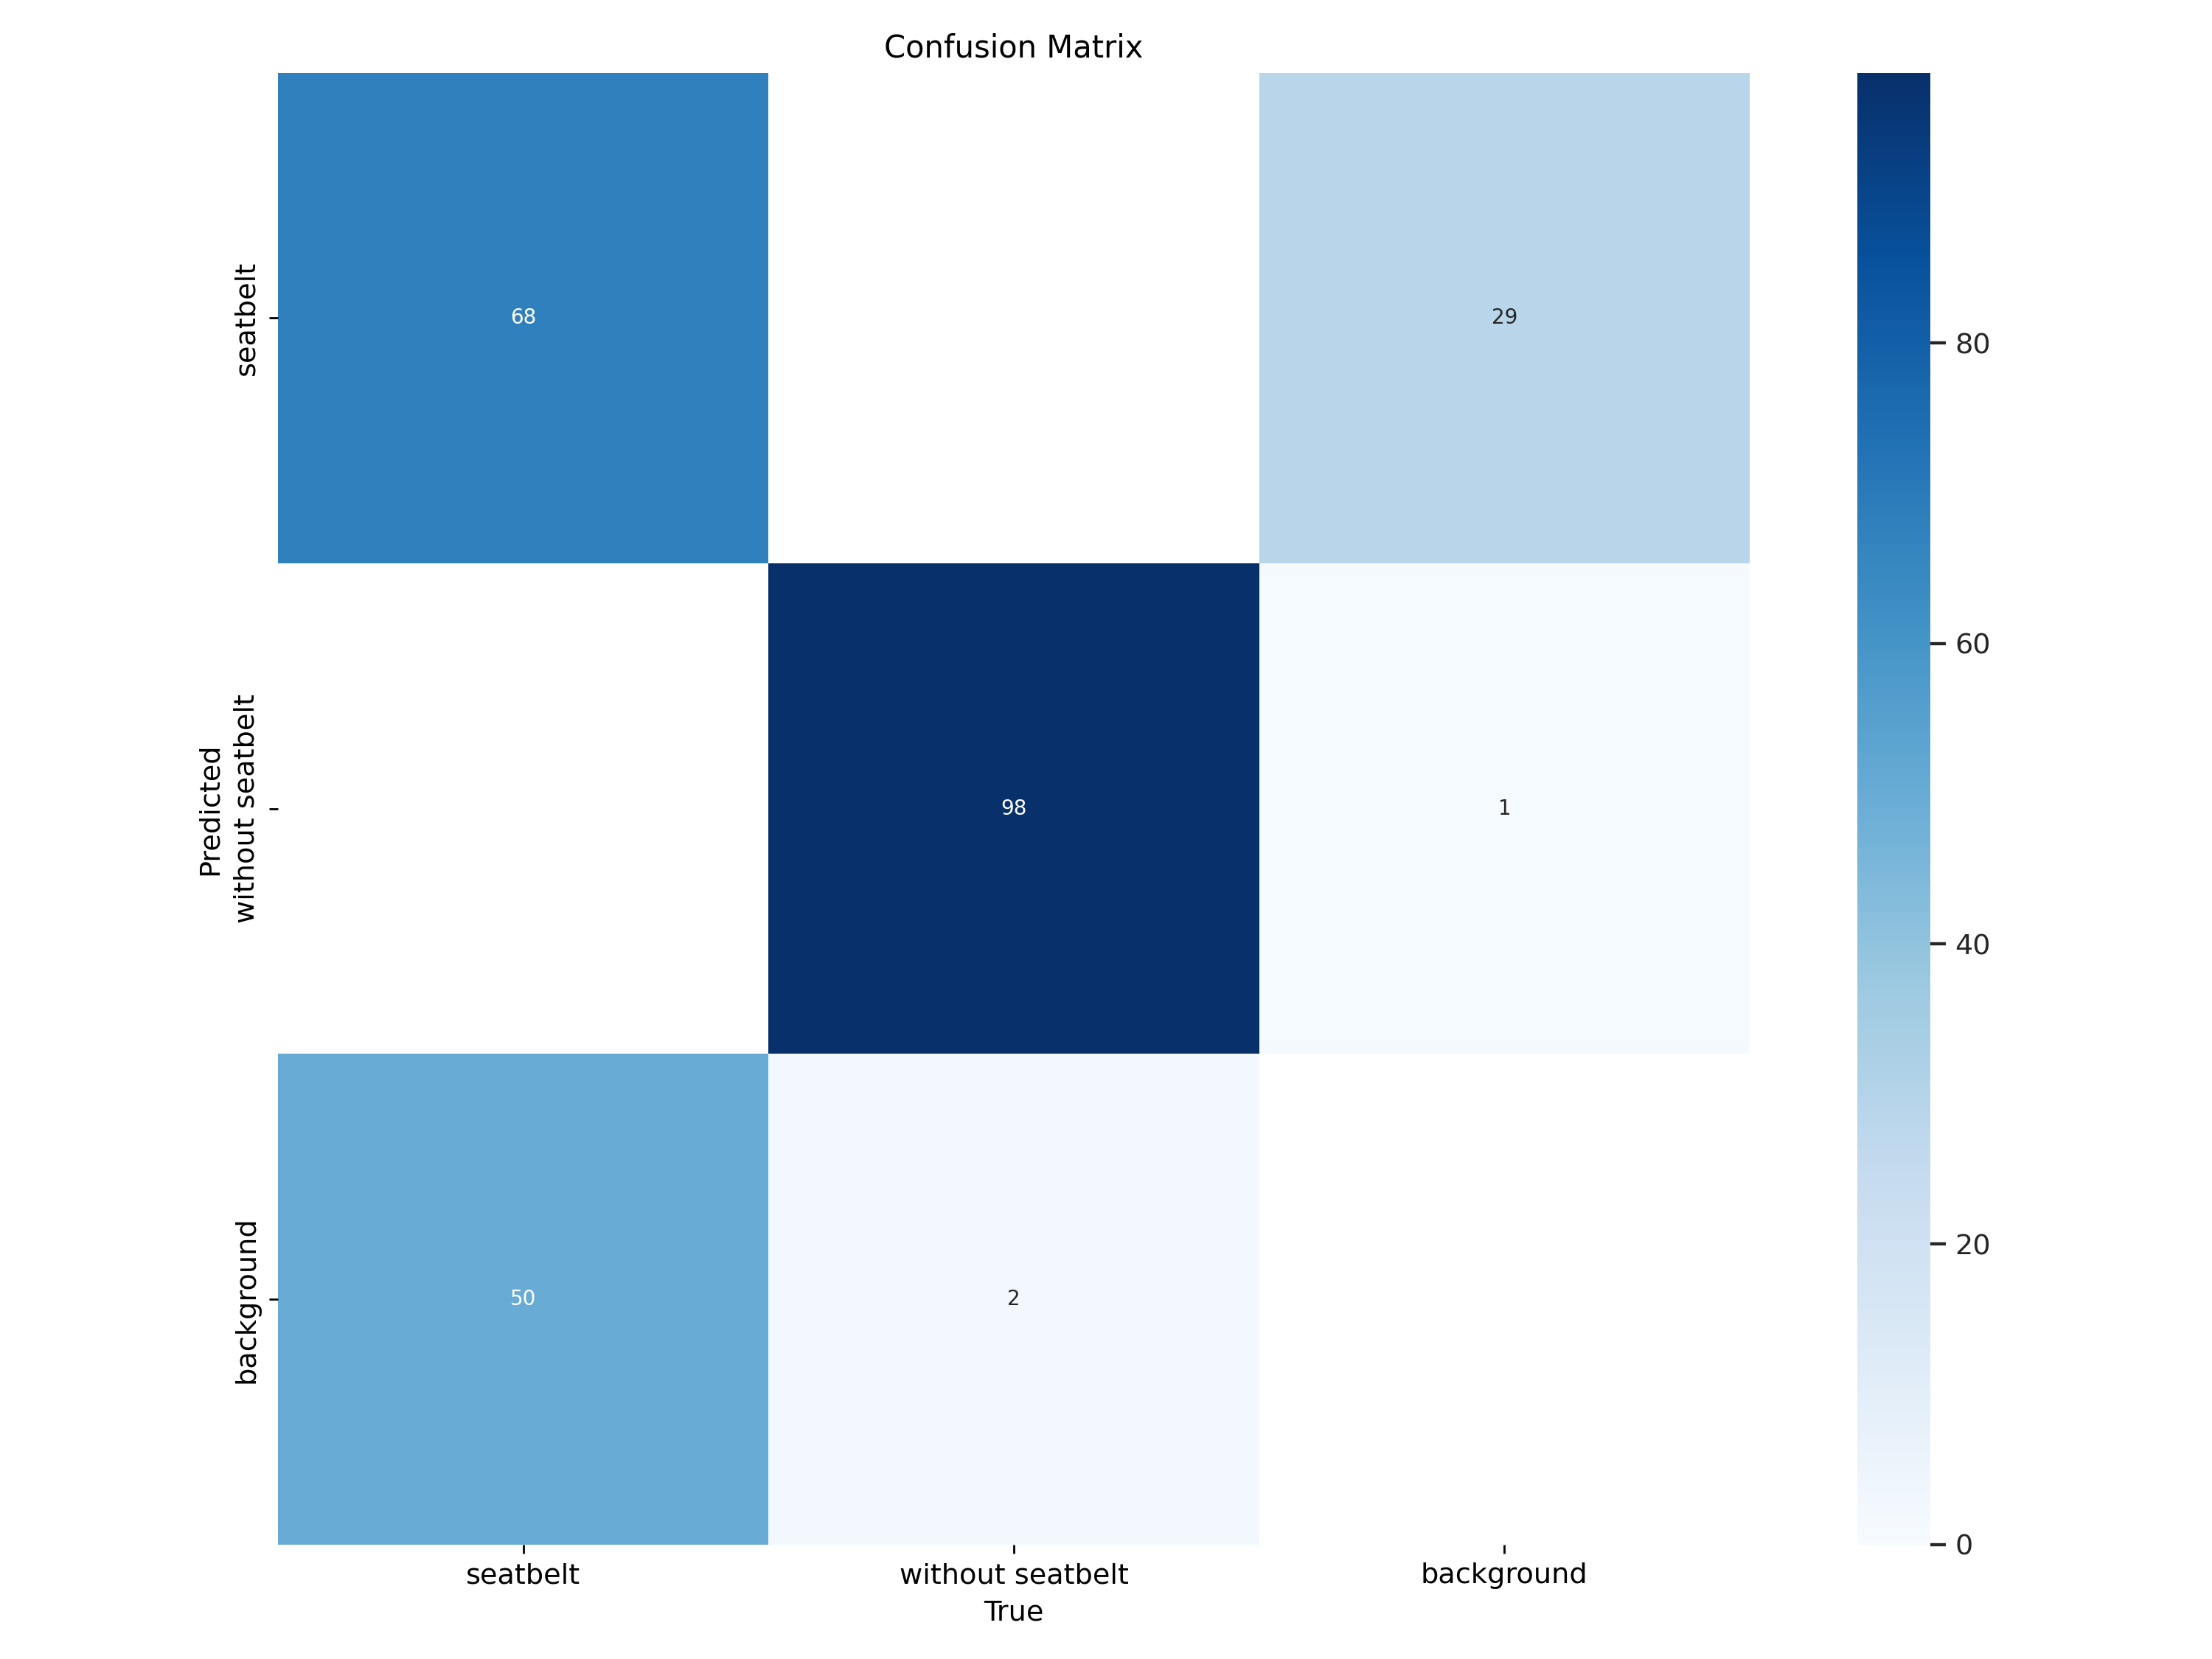

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

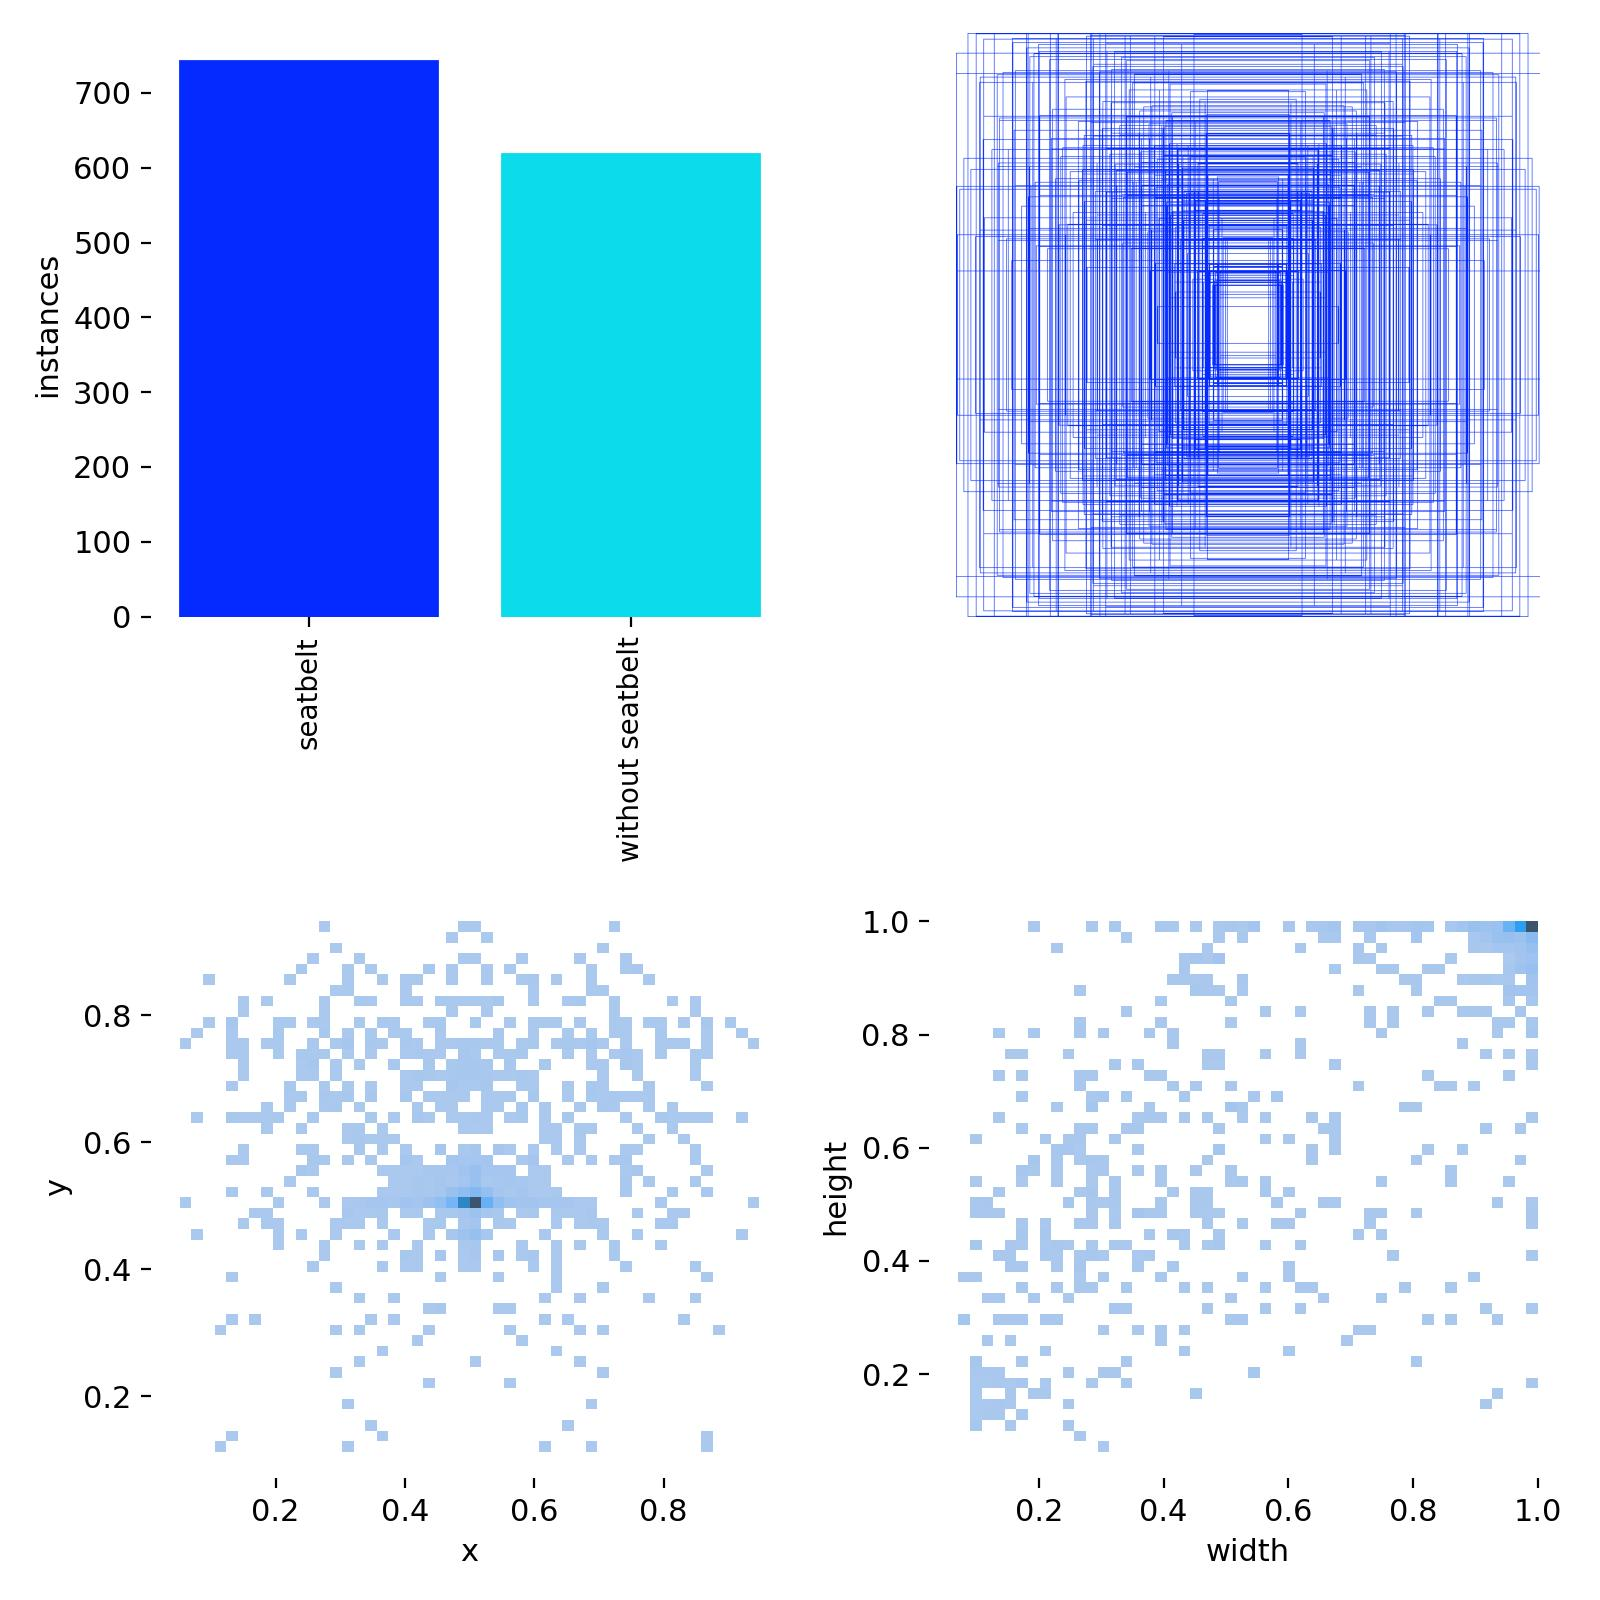

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

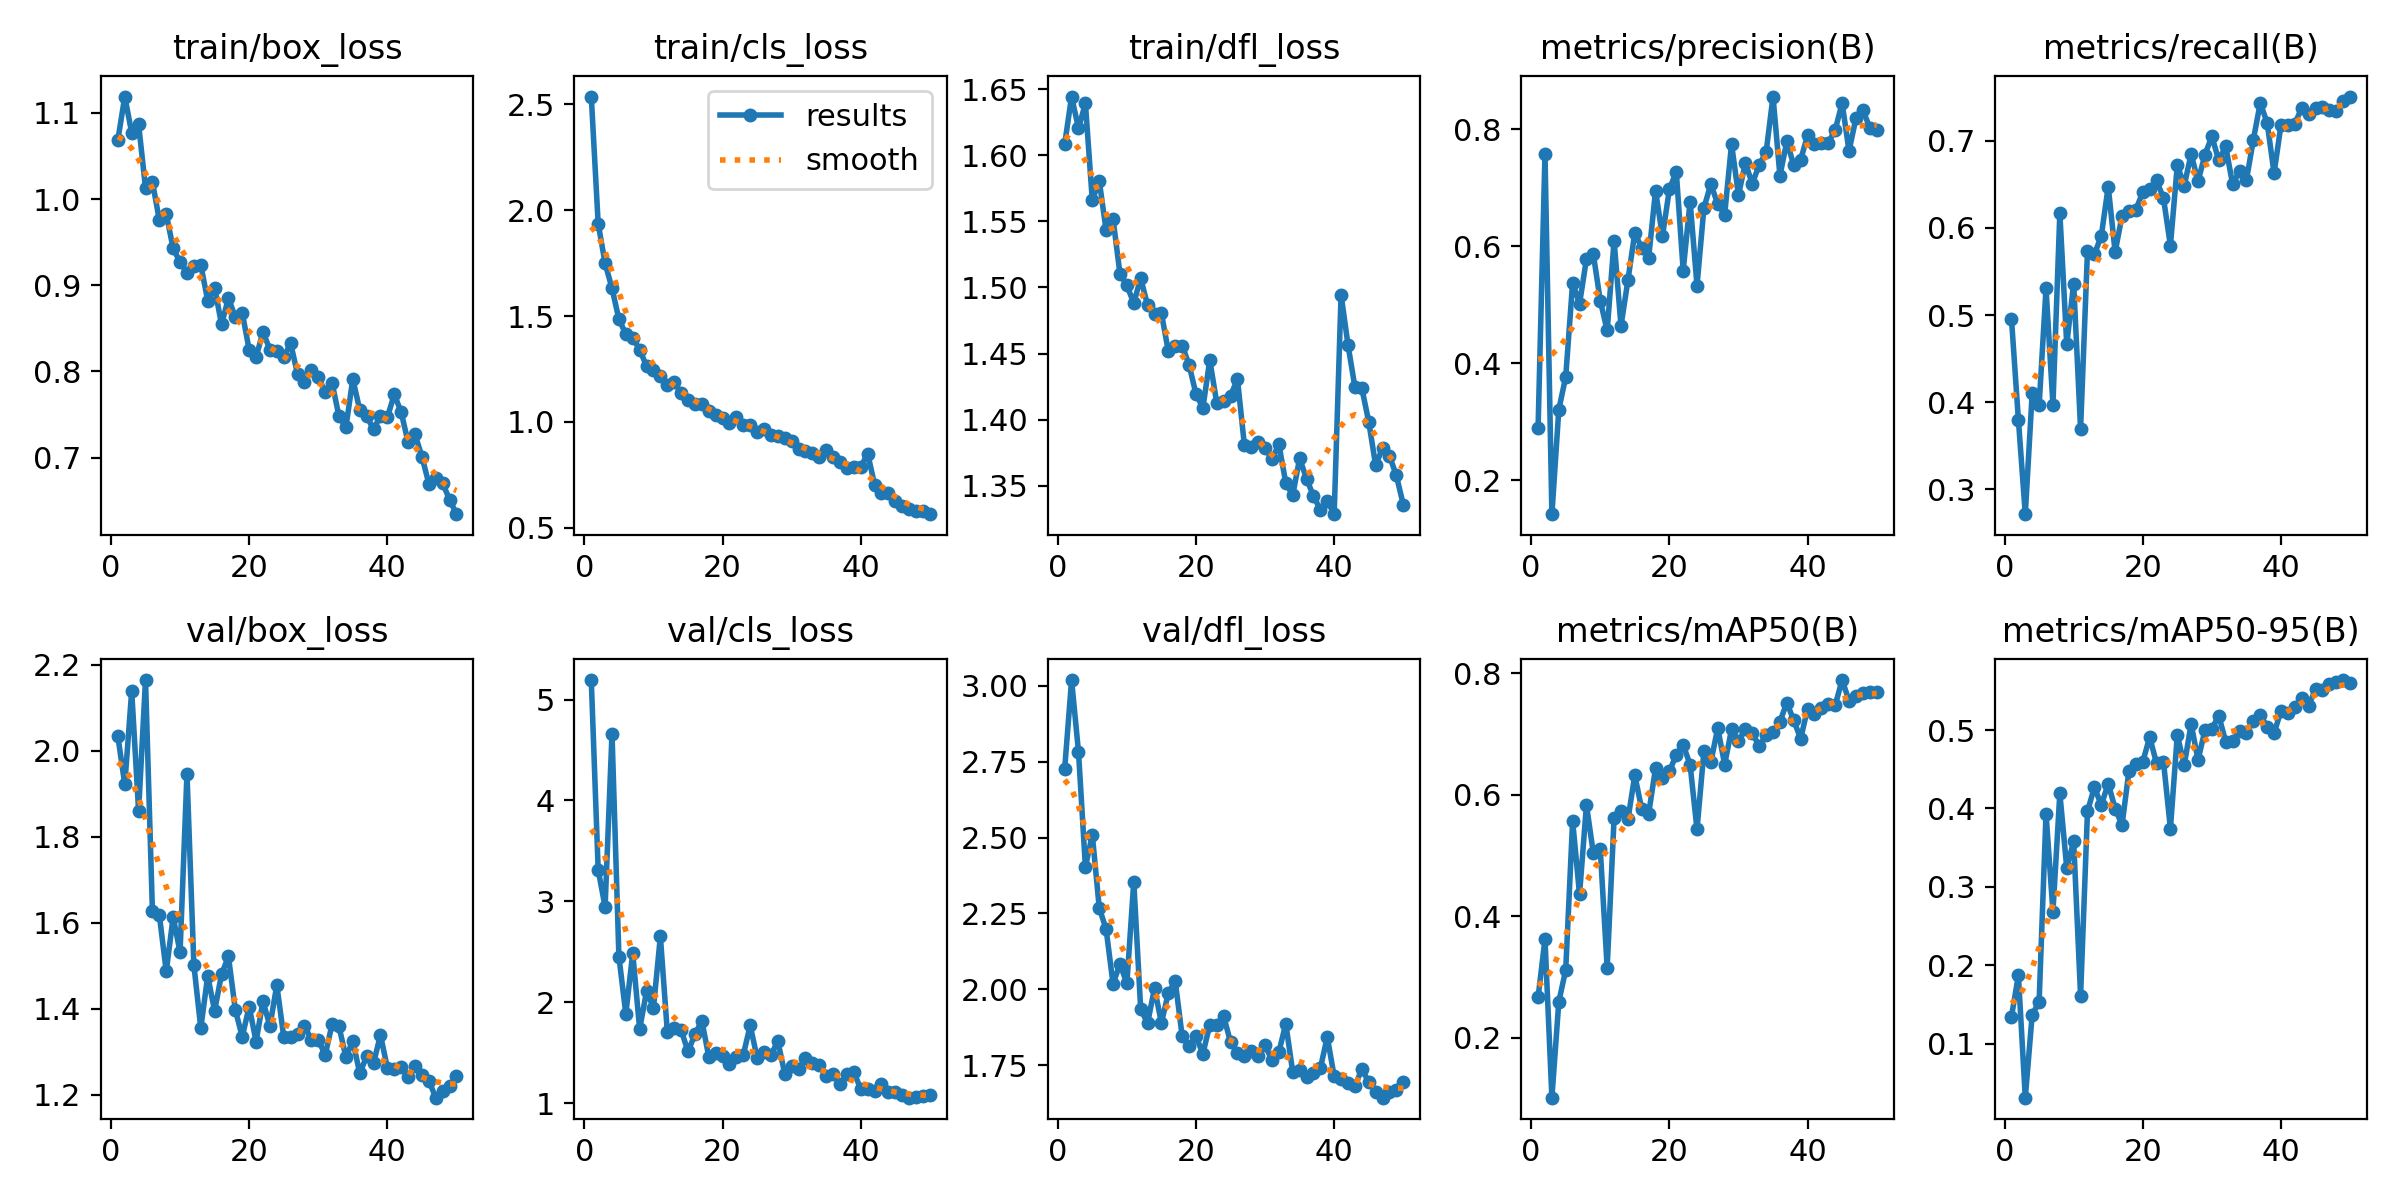

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

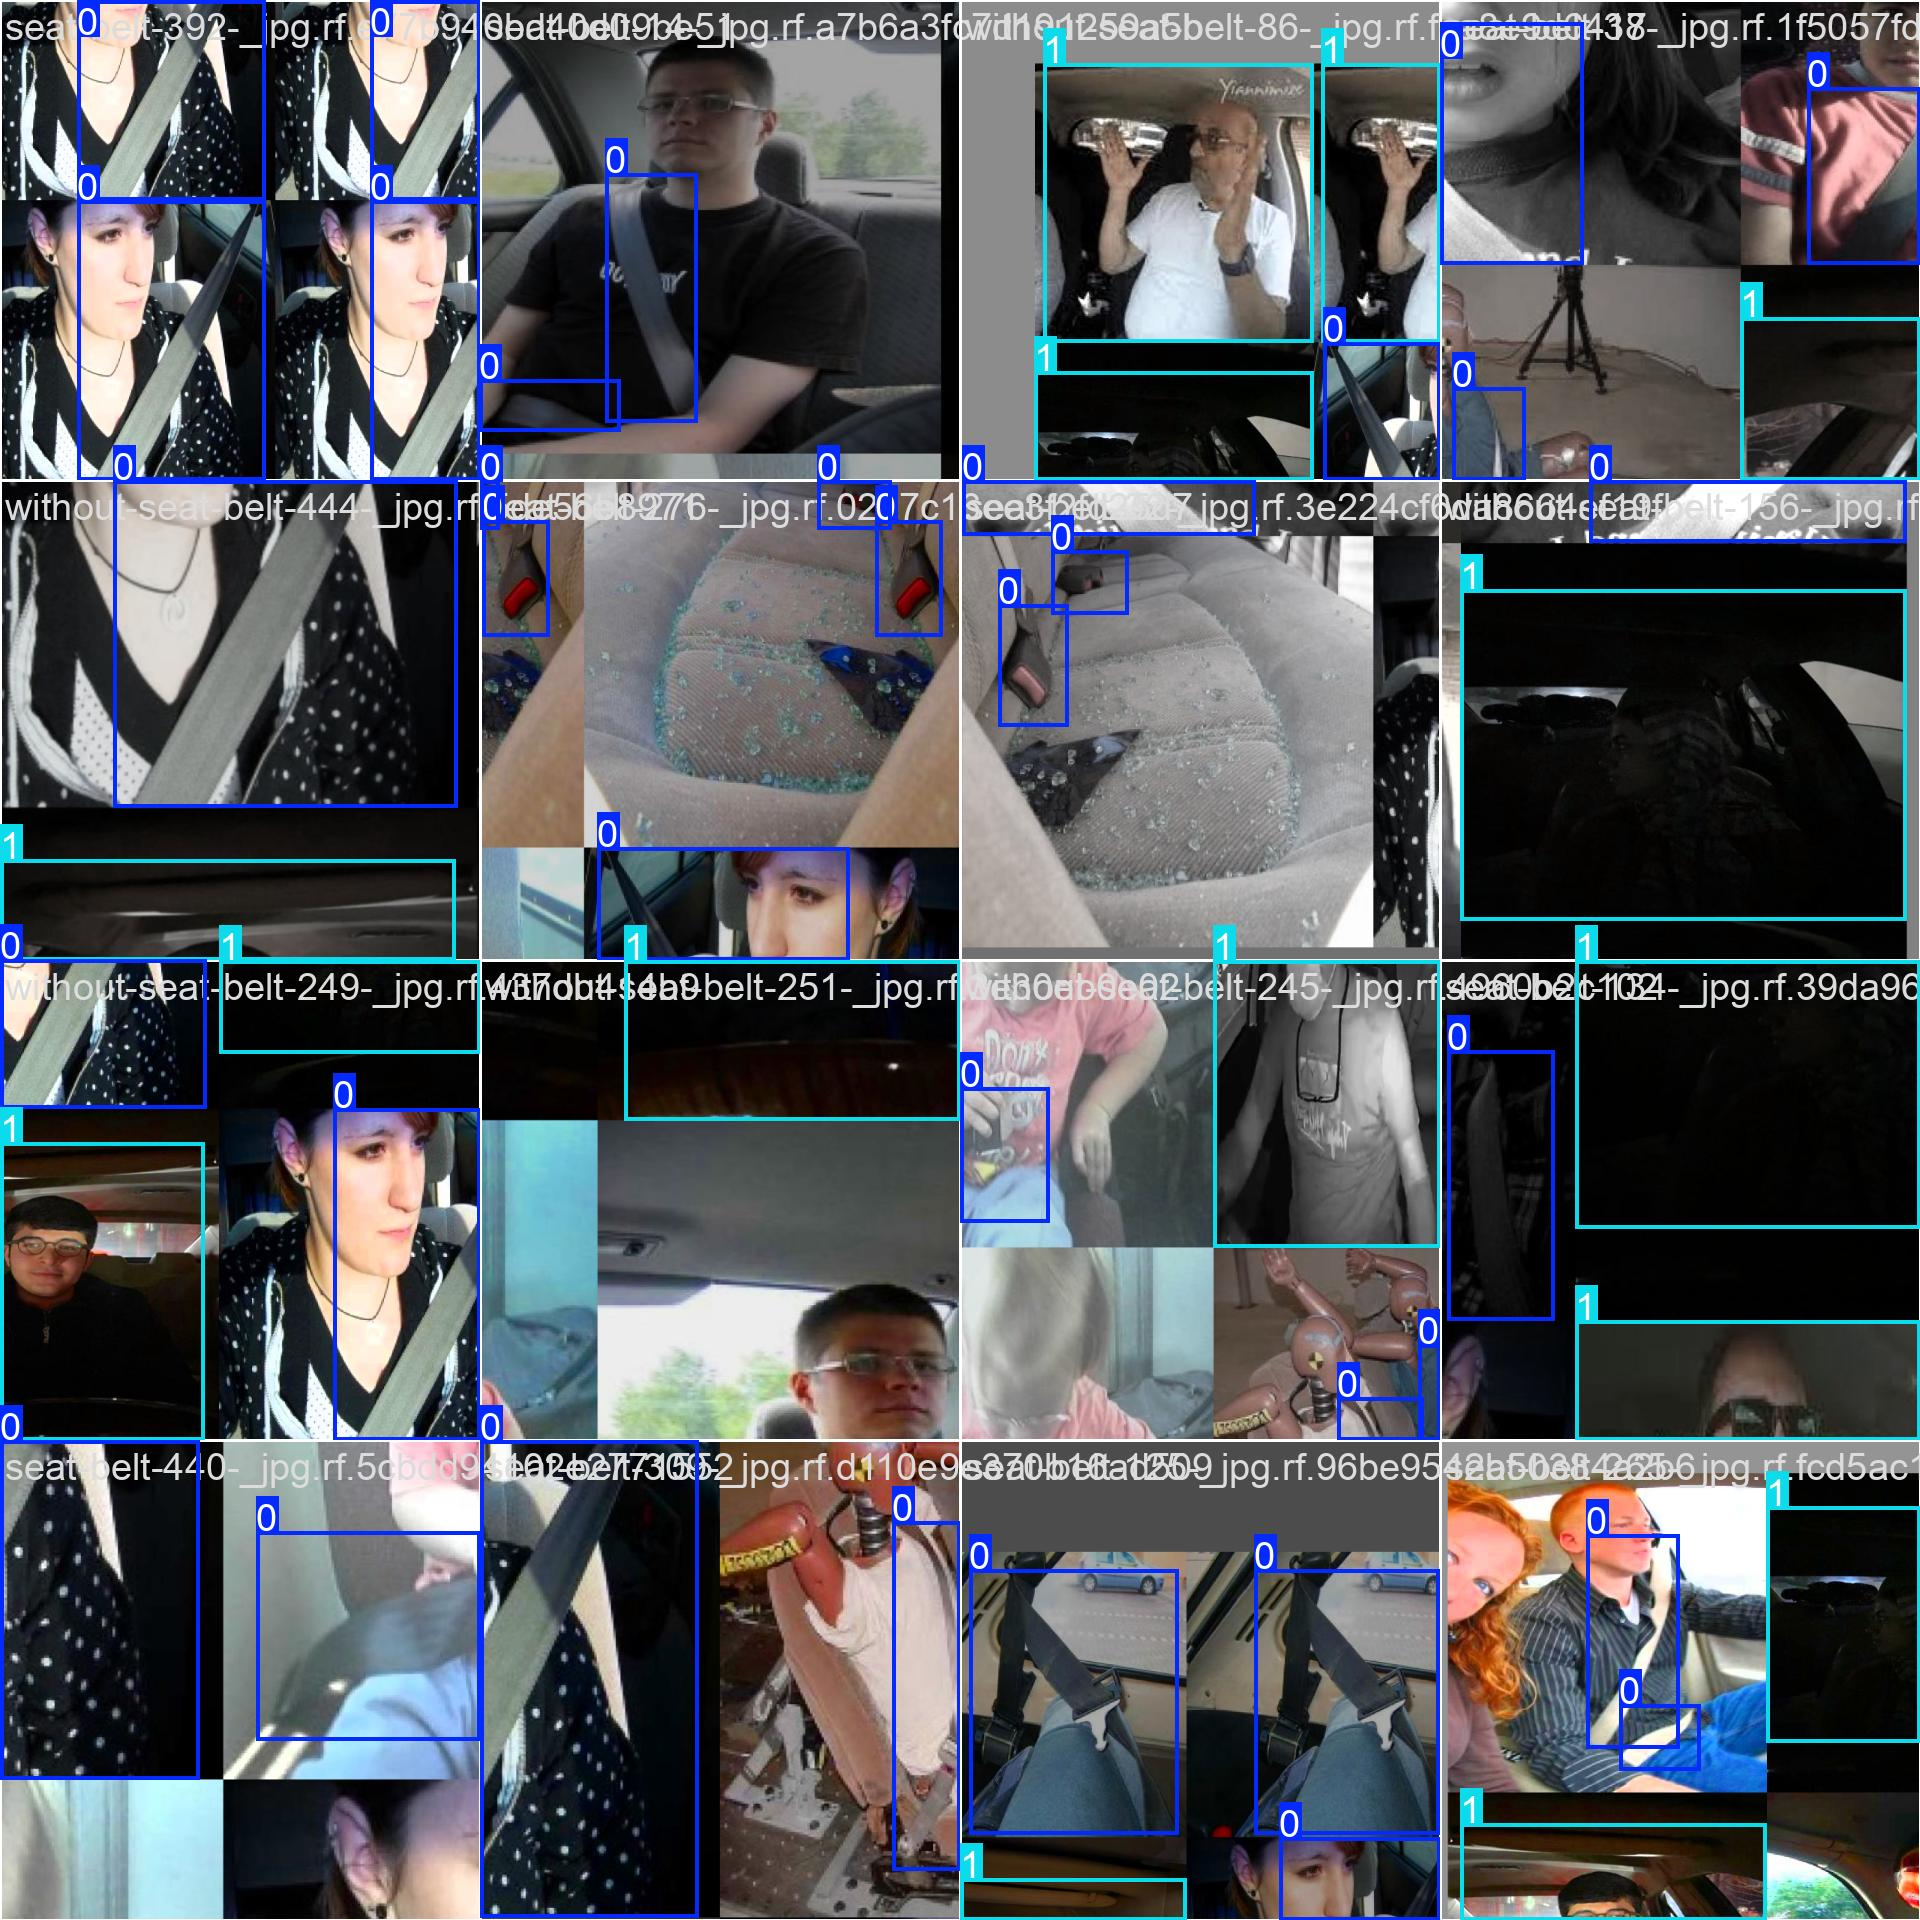

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

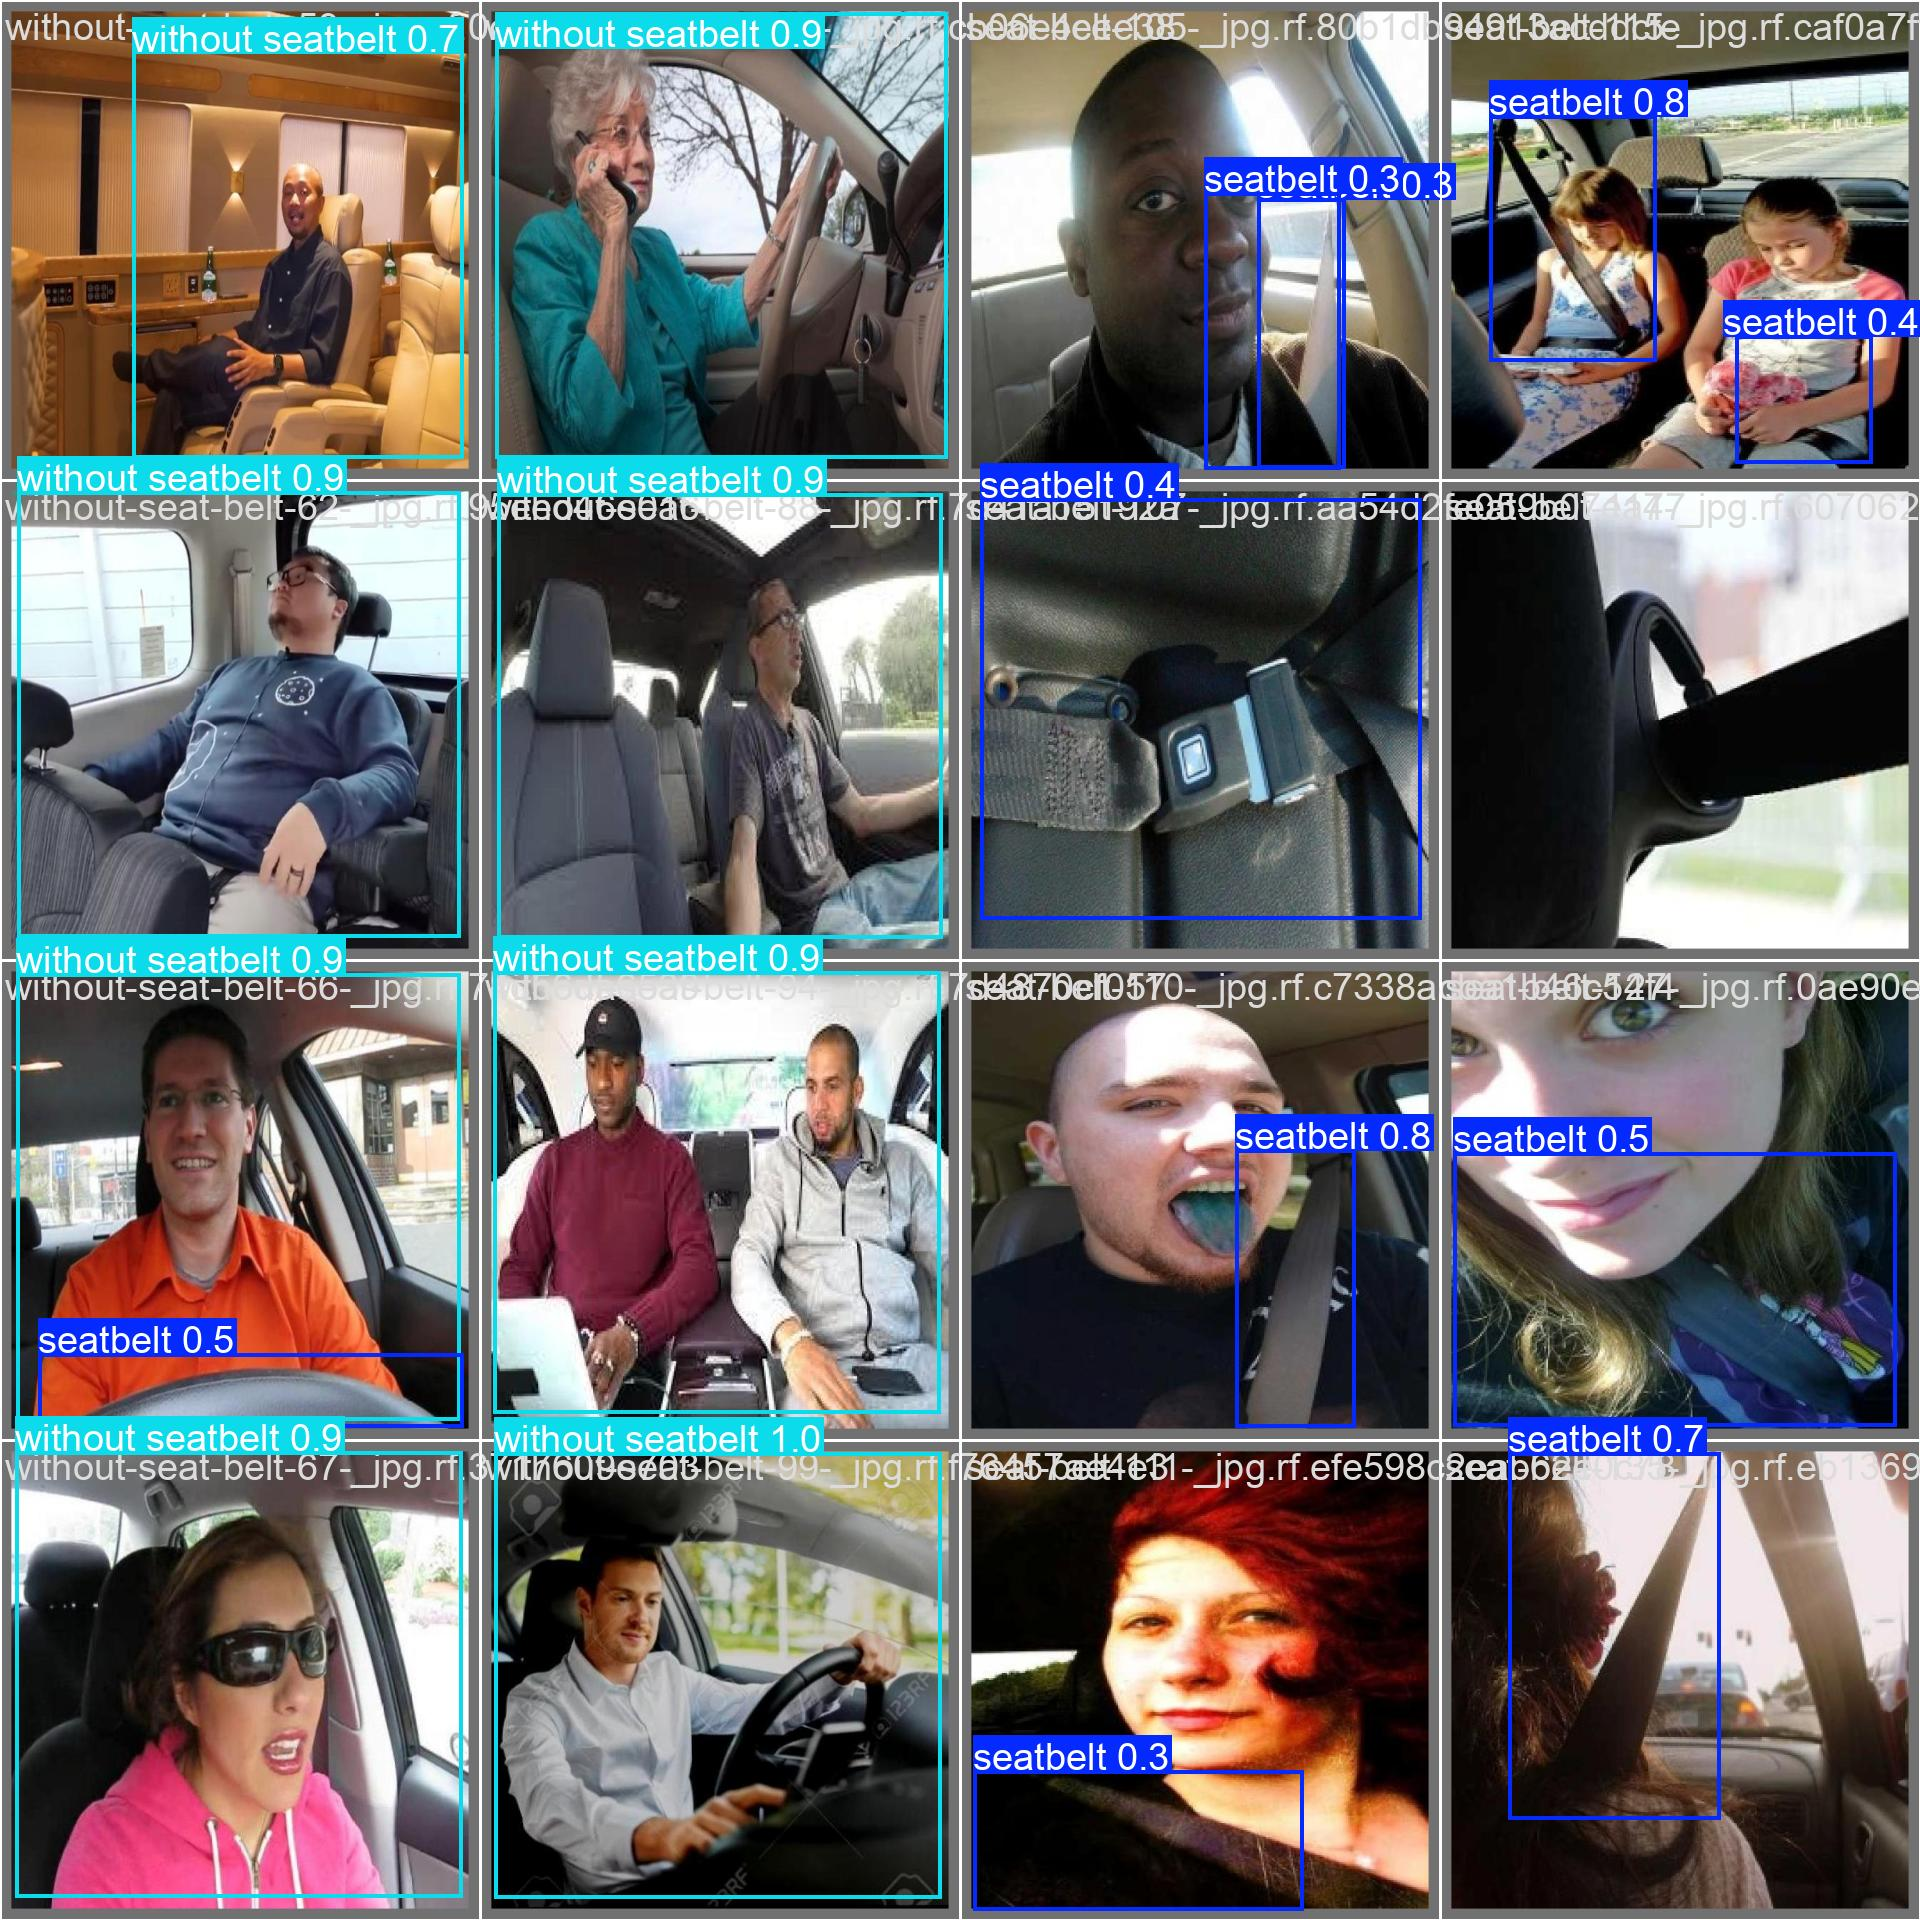

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

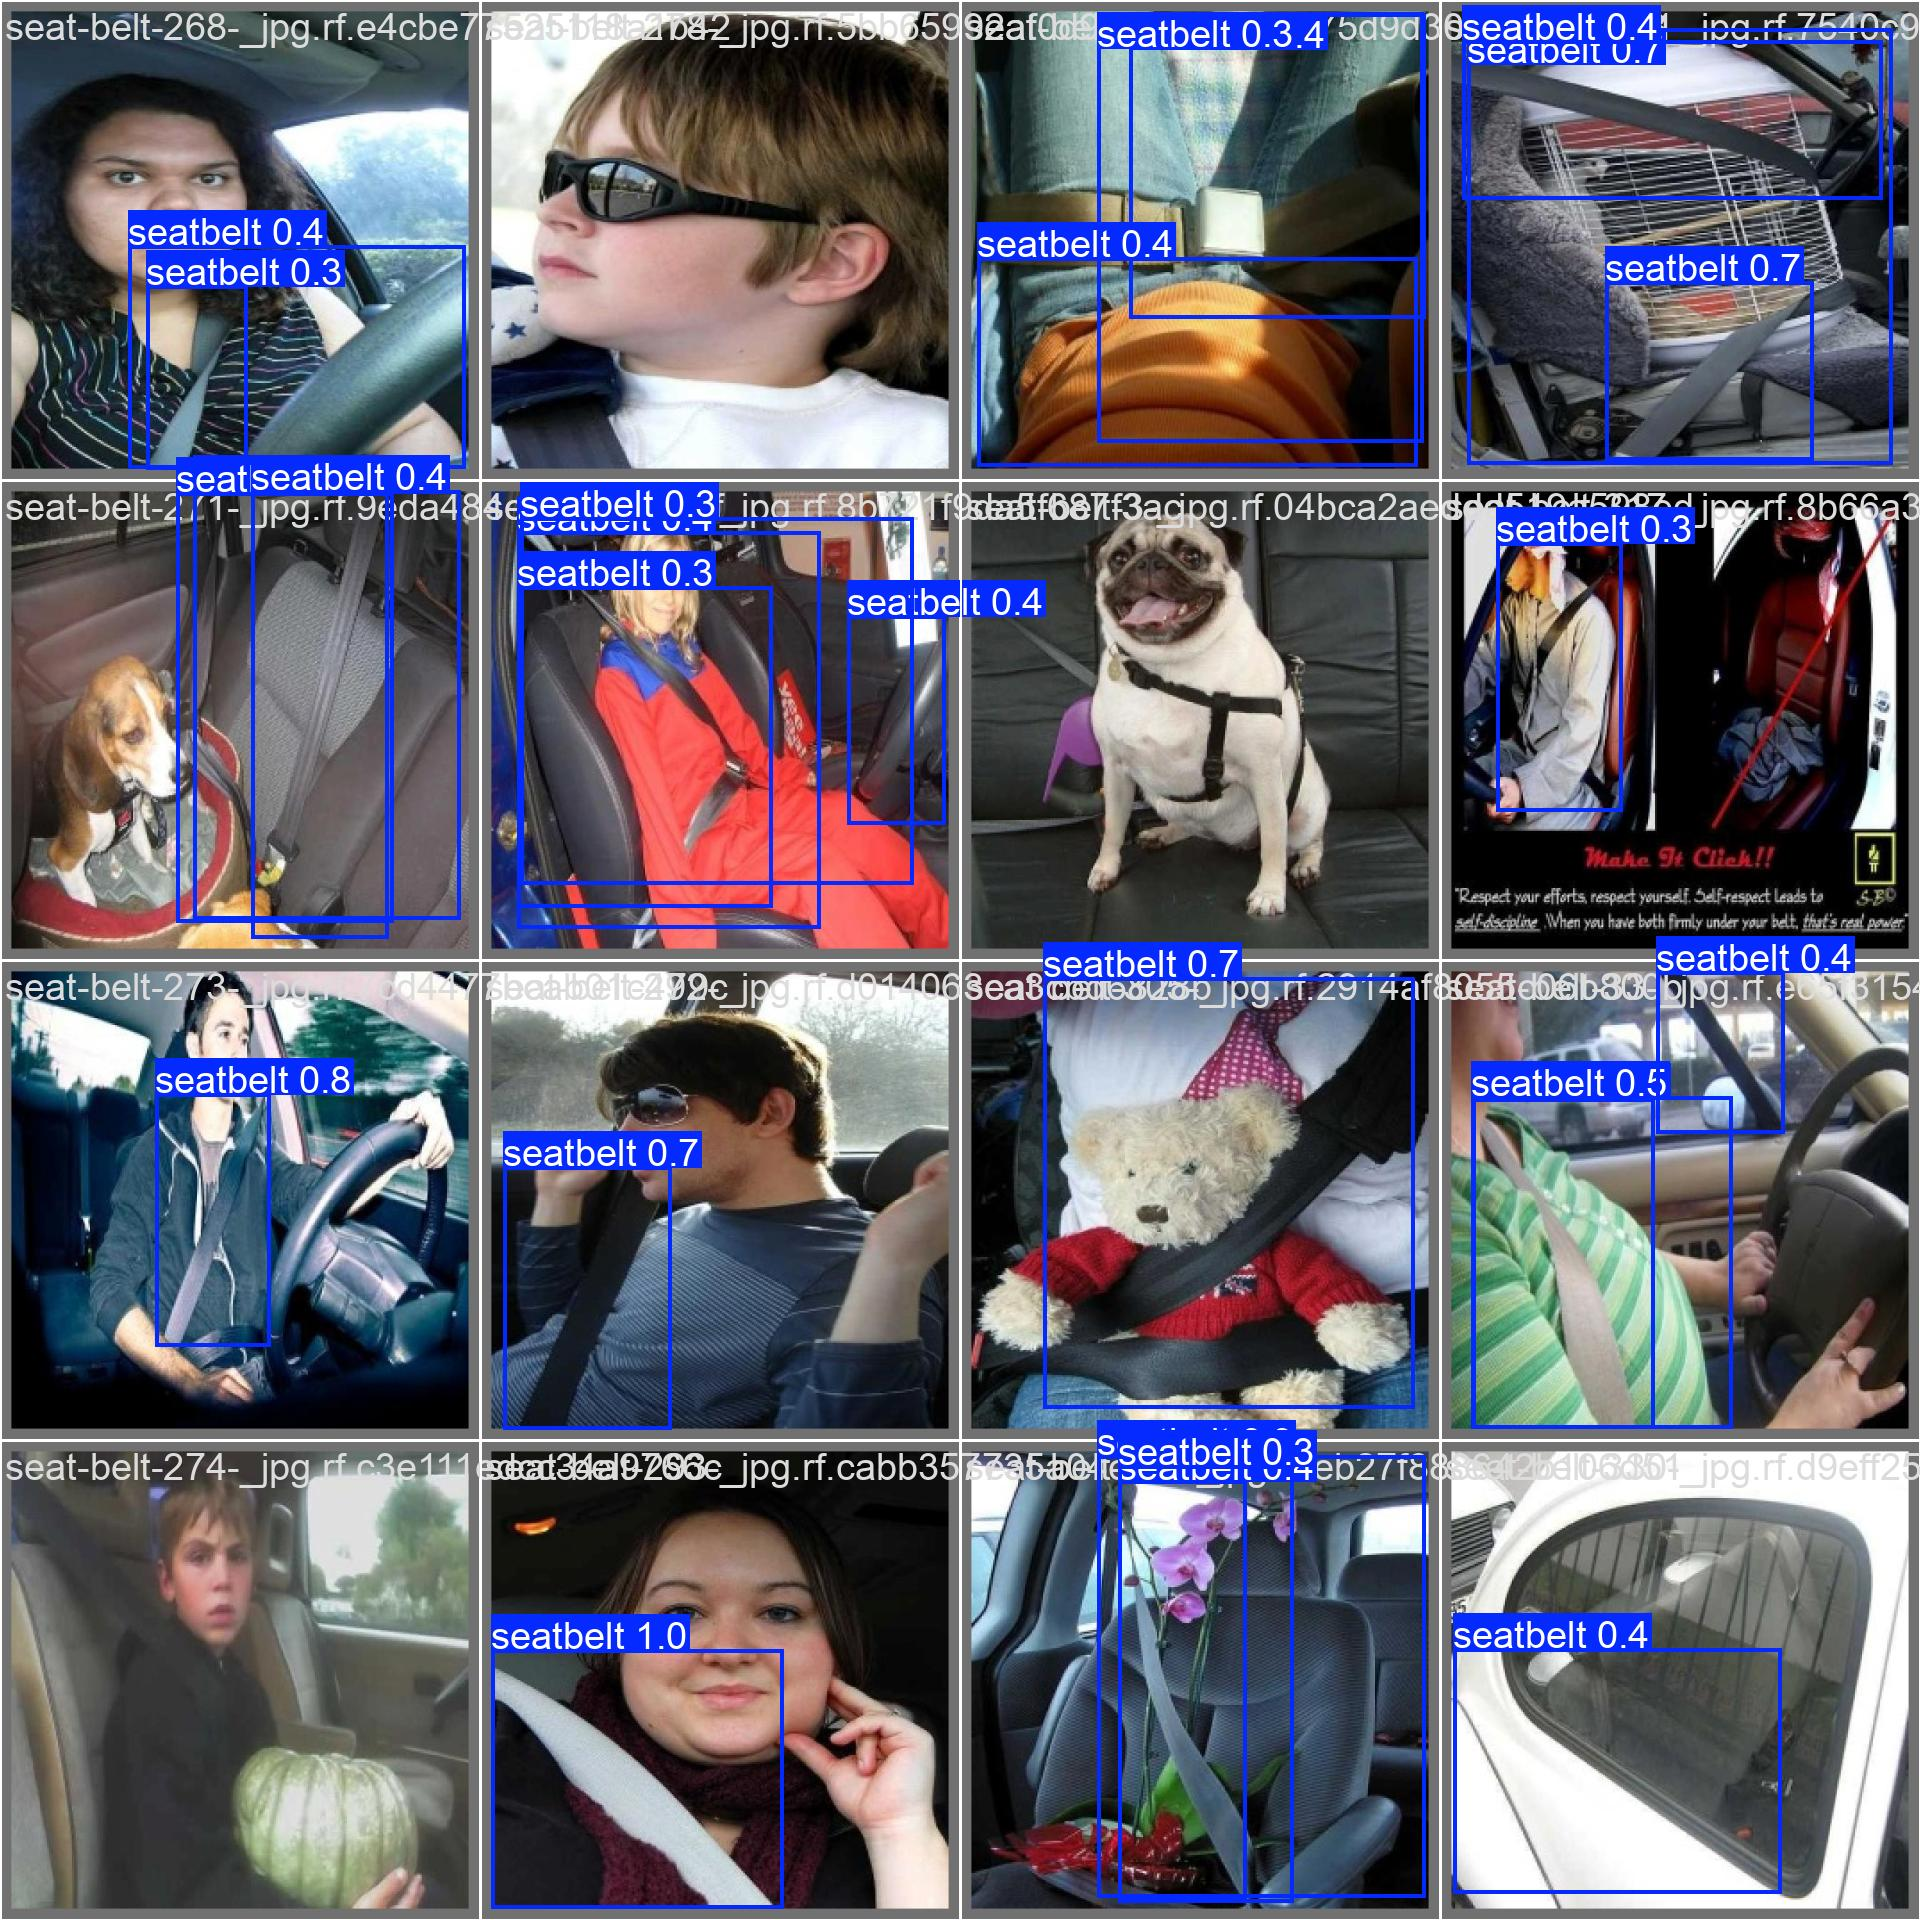

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-106-_jpg.rf.a4b19a5411786c8af9f0ca41560ae726.jpg: 640x640 1 seatbelt, 11.0ms
image 2/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-120-_jpg.rf.18bc3d70a0390e09ebbbec18619a0df3.jpg: 640x640 2 seatbelts, 8.5ms
image 3/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-129-_jpg.rf.00b95b798af44c9978d3501121d00d61.jpg: 640x640 1 seatbelt, 8.2ms
image 4/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-141-_jpg.rf.f9656321cd4825e6b02ef00d71a136a1.jpg: 640x640 2 seatbelts, 9.3ms
image 5/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-156-_jpg.rf.4ad8fef518d3c5055d722fe9184b241e.jpg: 640x640 1 seatbelt, 9.1ms
image 6/100 /content/Seat-Belt-Detection-1/test/images/seat-belt-160-_jpg.rf.b12f8f892cbecd0ac1b540c2a458831e.jpg: 640x640 1 s

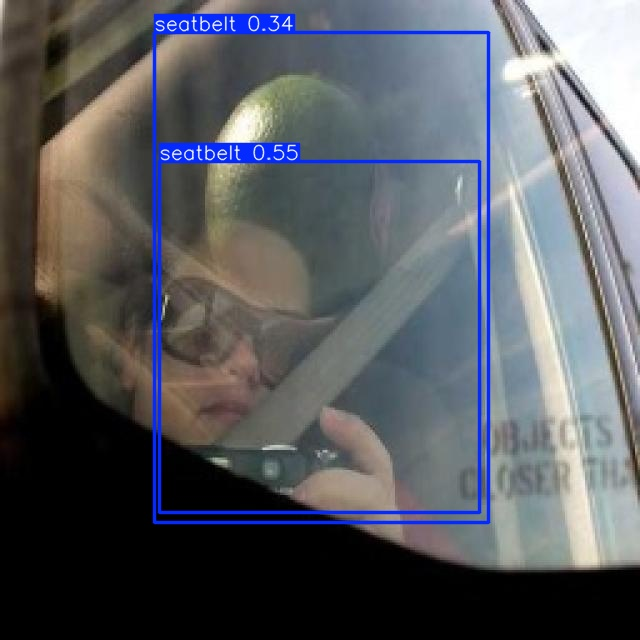

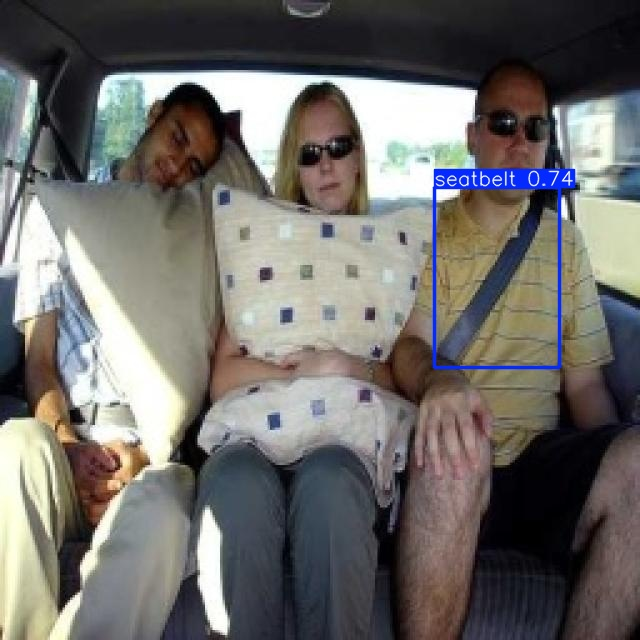

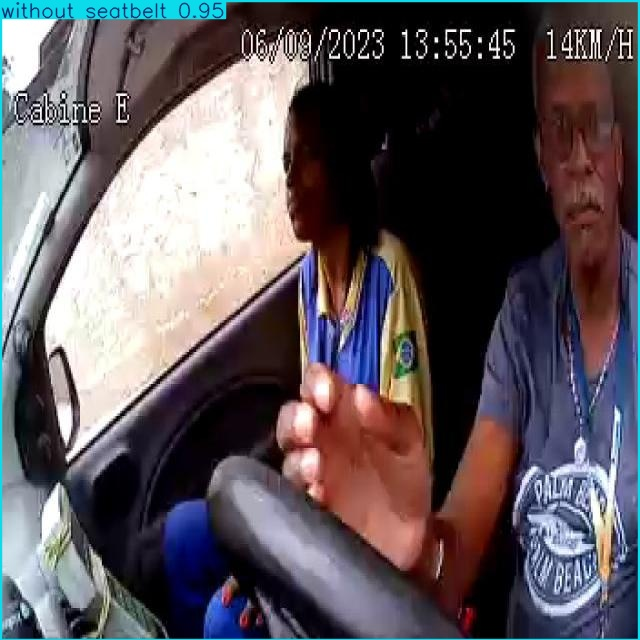

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=seatbelt.jpg save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 969, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 557, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 188, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 36, in generator_context
    response = gen.send(None)
  File "/usr/local/lib/python3.

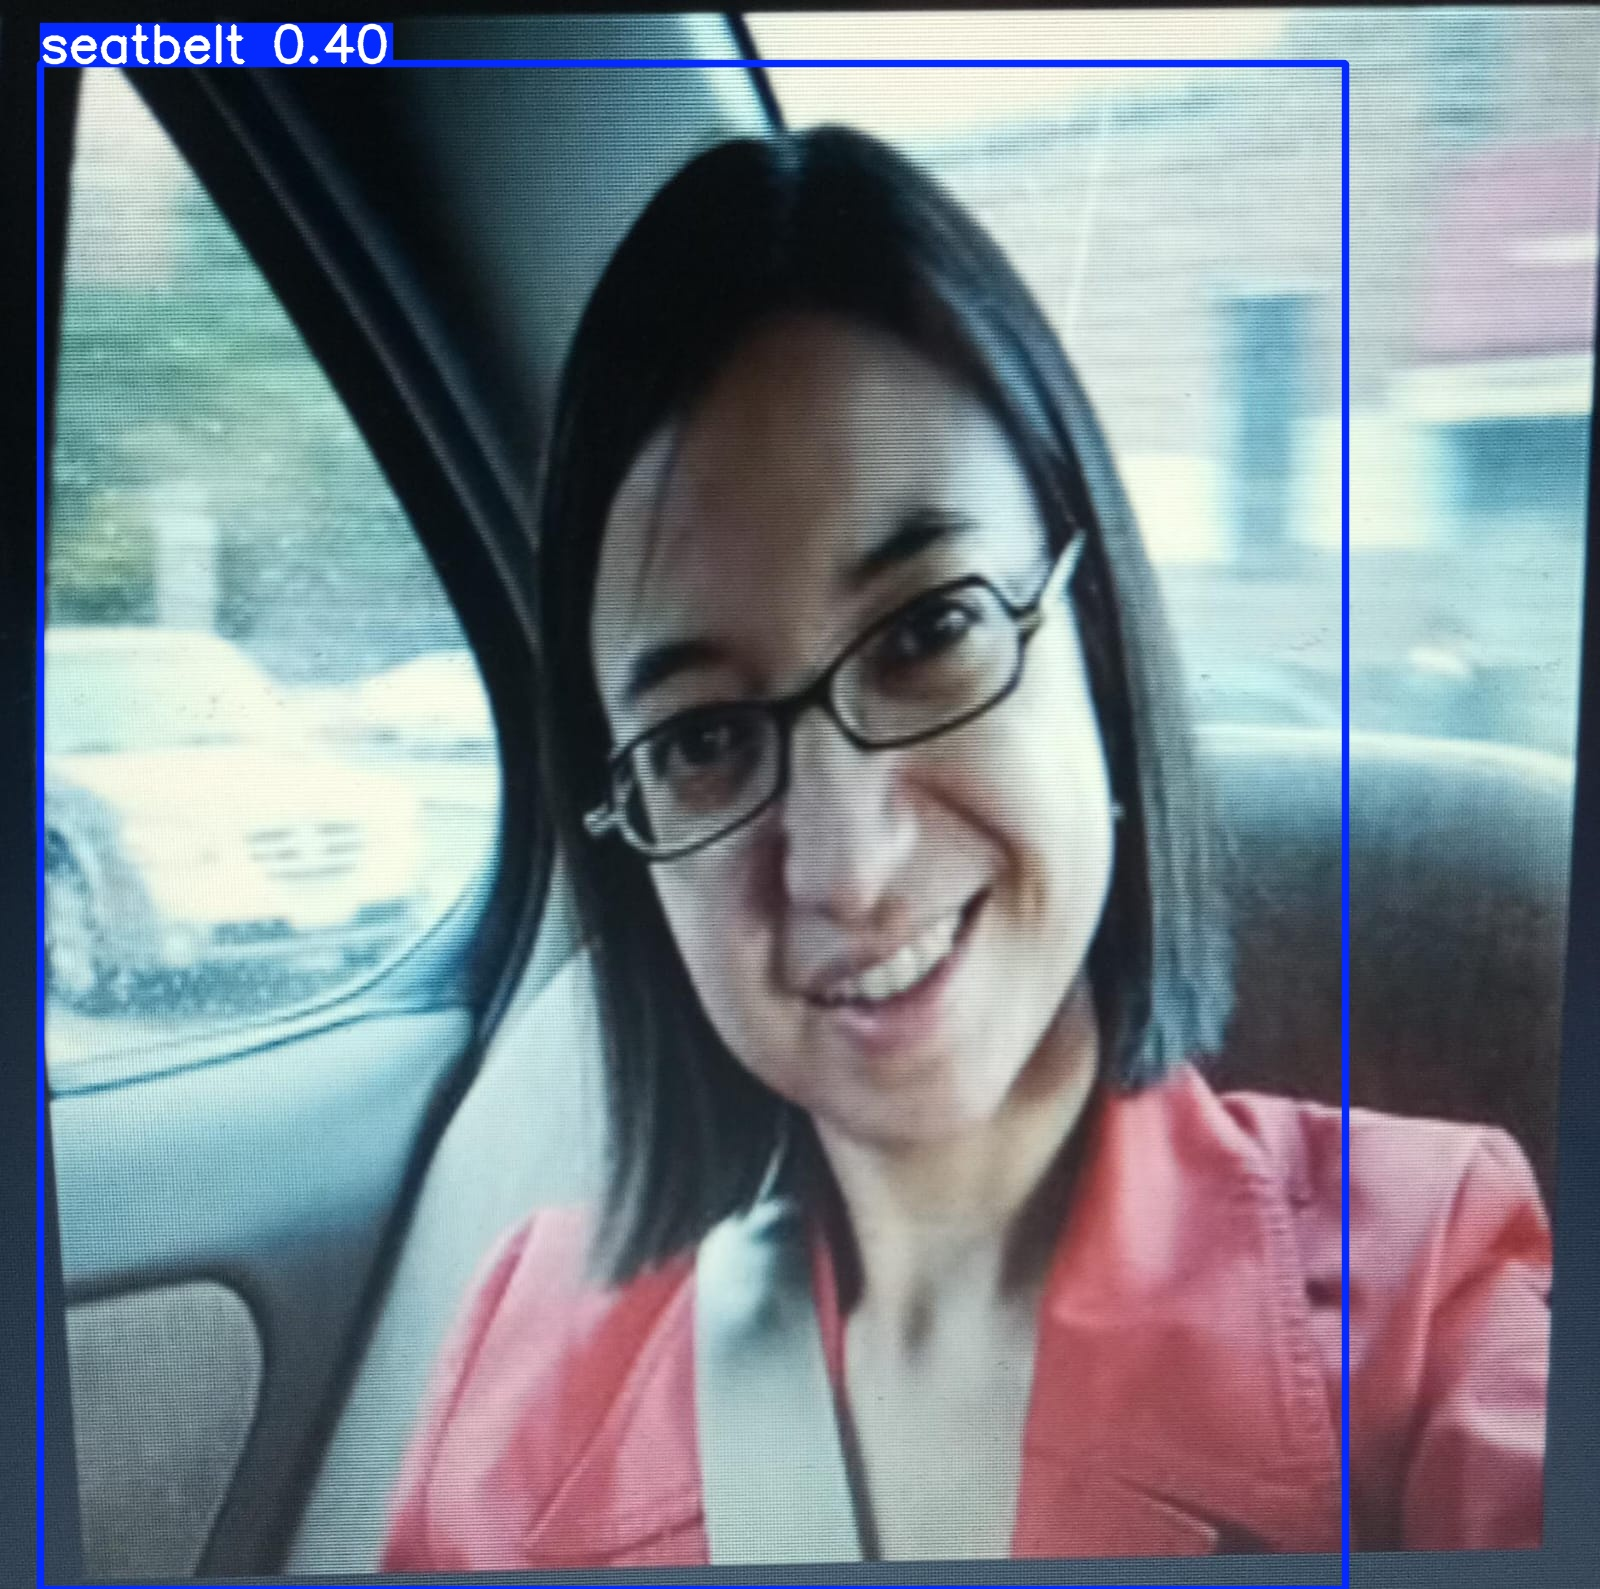

In [ ]:
Image("/content/runs/detect/predict2/seatbelt.jpg", width=600)

**Step # 08 Deploy the model on roboflow**

In [ ]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1733144678.1fce22ddebee.1242.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3120.jpg  weights
P_curve.png					    train_batch3121.jpg
PR_curve.png					    train_batch3122.jpg


In [ ]:
project = rf.workspace("dti-fzj6g").project("seat-belt-detection-c3csr")
version = project.version(5)

project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/dti-fzj6g/seat-belt-detection-c3csr/5
Share your model with the world at: https://universe.roboflow.com/dti-fzj6g/seat-belt-detection-c3csr/model/5
